<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


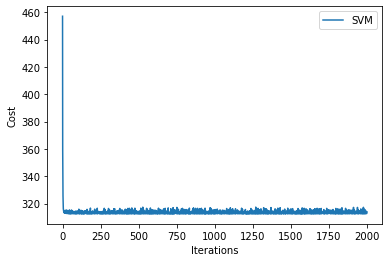

SVM Accuracy: 81.56%


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\moksh\\OneDrive\\Desktop\\titanic.csv")

df.head()
df.info()
df.describe()

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df.drop('Survived', axis=1).values
y = df['Survived'].values

X = (X - X.mean(axis=0)) / X.std(axis=0)

X = np.c_[np.ones(X.shape[0]), X]

np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_size = int(0.8 * X.shape[0])
X_train = X[indices[:train_size]]
y_train = y[indices[:train_size]]
X_test = X[indices[train_size:]]
y_test = y[indices[train_size:]]

def cost_svm(theta, X, y, C):
    m = X.shape[0]
    h = X.dot(theta)
    return (1 / 2) * theta.T.dot(theta) + C * np.sum(np.maximum(0, 1 - y * h))


def gradient_svm(theta, X, y, C):
    m = X.shape[0]
    h = X.dot(theta)
    return theta + C * X.T.dot((y * h < 1).astype(int) * -y)


def gradient_descent_svm(X, y, C, alpha, iterations):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros(n)
    J_history = []
    for i in range(iterations):
        theta = theta - alpha * gradient_svm(theta, X, y, C)
        J_history.append(cost_svm(theta, X, y, C))
    return theta, J_history


def predict_svm(theta, X):
    h = X.dot(theta)
    return (h >= 0).astype(int)


def accuracy_svm(theta, X, y):
    y_pred = predict_svm(theta, X)
    return np.mean(y_pred == y)



C = 1
alpha = 0.001
iterations = 2000
theta_svm, J_history = gradient_descent_svm(X_train, y_train * 2 - 1, C, alpha, iterations)

# Plotting

plt.plot(range(iterations), J_history, label='SVM')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()



acc_svm = accuracy_svm(theta_svm, X_test, y_test)
print('SVM Accuracy: {:.2f}%'.format(acc_svm * 100))
